<a href="https://colab.research.google.com/github/marekpiotradamczyk/ml_uwr_23/blob/main/Assignments/BONUS_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BONUS Assignment

**Submission deadline:**
* **12.2.24**

**Points: 5 + 5 + [0, 1,...,10] BONUS points**


In this lecture https://github.com/marekpiotradamczyk/ml_uwr_23/blob/master/Lectures/10-neural_networks.ipynb you've seen a simple generative model for MNIST digits. The outline was as follows:
1. Take from MNIST only images with digit 1, call this dataset $X^1_{mnist}$;
2. Compute 1D t-SNE embeddings which you can view as a function $\phi: \mathbb{R}^{784} \mapsto \mathbb{R}$;
3. Learn with a simple one hidden layer neural network a function inverse to $\phi$;
4. Now generate a random point $x\in \mathbb{R}$ which is reasonably close enough to the 1D embedding points, i.e., $\phi(X^1_{mnist})$, calculate $\phi^{-1}(x)$. Since $\phi^{-1}(x) \in \mathbb{R}^{784}$, you can view $\phi^{-1}(x)$ as an artificially created image with digit 1.
5. We could see that the artificially generated images on one side nicely capture the high level features of the digit 1 from the mnist dataset. On the other hand however their quality wasn't as sharp as in the original MNIST. And it was confirmed by having a `k-NN(k=3)` discriminator, which had 95% accuracy in distinguishing between real and fake images.

Remark: The random points in `4.` cannot be equal to the embedding of the actual MNIST images. Otherwise we would have reconstructions of the images and not artificial new ones. 

# Task 1 [5p]

Do very much the same, but
1. Take from MNIST only images with digit 1, call this dataset $X^1_{mnist}$;
2. Compute t-SNE embeddings but now with `n_components=3`
   1. Scatterplot in 3D the obtained cloud of points
4. Learn with a neural network a function inverse to $\phi$; you can use as many layers as you want, but you cannot use convolutional layers;
5. Generate randomly points from the 3D space of the embedding, and calculate $\phi^{-1}$ on these points, which will give you a new set of images
6. Assess the quality of the generation with a `k-NN(k=3)` discriminator. You should get accuracy less than $90\%$ to consider the task solved. 

**Remark about point 4** 

Plotting in 3D has to be done using `plotly.graph_objects` as in here https://github.com/marekpiotradamczyk/ml_uwr_23/blob/master/Assignments/Assignment8.ipynb

After plotting the 3D scatter plot in task `2.A.` you will see that the shape is not a perfect circle nor any easily definable manifold. So how one can draw random points from such a manifold boundary? 

There are many ways, but the simplest way would be as follows. First, calculate for each 3D embedded points of MNIST the distance to the closest neighbour. Now take the average such distance over all 3D embedded points, call it $\varepsilon$.
Once you calculate $\varepsilon$ you can generate random points two ways.
First:
1. randomly pick an mnist digit $x$;
2. look at its t-SNE embedding $\phi(x) \in \mathbb{R}^3$;
3. generate a random point from $\mathcal{N}\left(\phi(x), \varepsilon\cdot \begin{pmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{pmatrix}\right)$, i.e., a point from a 3D Gaussian centered at $\phi(x)$
4. repeat couple of thousand times to get appropriate number of random points

Second:
1. the cloud of points should be roughly enclosed in a $[-20,20]\times [-20,20] \times [-20, 20] \subset \mathbb{R}^3$ cube
2. generate randomly a point $x_{random}$ from this cube
3. calculate the distance to the closest point in the cloud (u can use `from sklearn.neighbors import NearestNeighbors` for example)
4. if the distance is less than $\varepsilon$, then take it to the set of random points, and otherwise discard it
5. repeat enough many thousand of times

# Task 2 [5p]

Do the same as above, but don't use a neural network to learn $\phi^{-1}$. Try using gradient boosting methods or polynomial regression method, or use non-trivial features for the task. You don't have to write algorithms by hand if you can find a proper implementation from some python package. However please note that the code of gradient boosting from lecture https://github.com/marekpiotradamczyk/ml_uwr_23/blob/master/Lectures/11-boosting.ipynb is relatively simple.

# Competition [1-10p]

Every submitted solution to Task 1 will be ranked among other students' submissions. The smaller the accuracy of the `k-NN(k=3)` the higher the ranking. Author of the first place submission will score 10 points, author of the second place submission will score 9 points, and so on.

**Remark 1** in Task 1 you just need to use 3d t-SNE embeddings in order to score 5 points for the task. However in the competition we may allow embeddings of bigger dimension, but not too big. Let's say that the dimension of embedded space cannot be greater than 12. `sklearn` implementation of t-SNE doesn't allow for `n_components` bigger than 3, but feel free to use absolutely any method of embedding MNIST into $\mathbb{R}^{12}$ that you can find in some python package, or write it yourself. 

**Remark 2** Testing the accuracy has to be done in a systematic for the results to be comparable among participants. Hence you need to use the outline from the last cell of the neural network lecture https://github.com/marekpiotradamczyk/ml_uwr_23/blob/master/Lectures/10-neural_networks.ipynb that is:

**Remark 3** Since this task is about generating MNIST digits, it's an absolute must to actually visualize the digits. 
Simple code like that will do the trick:

and it will produce you this
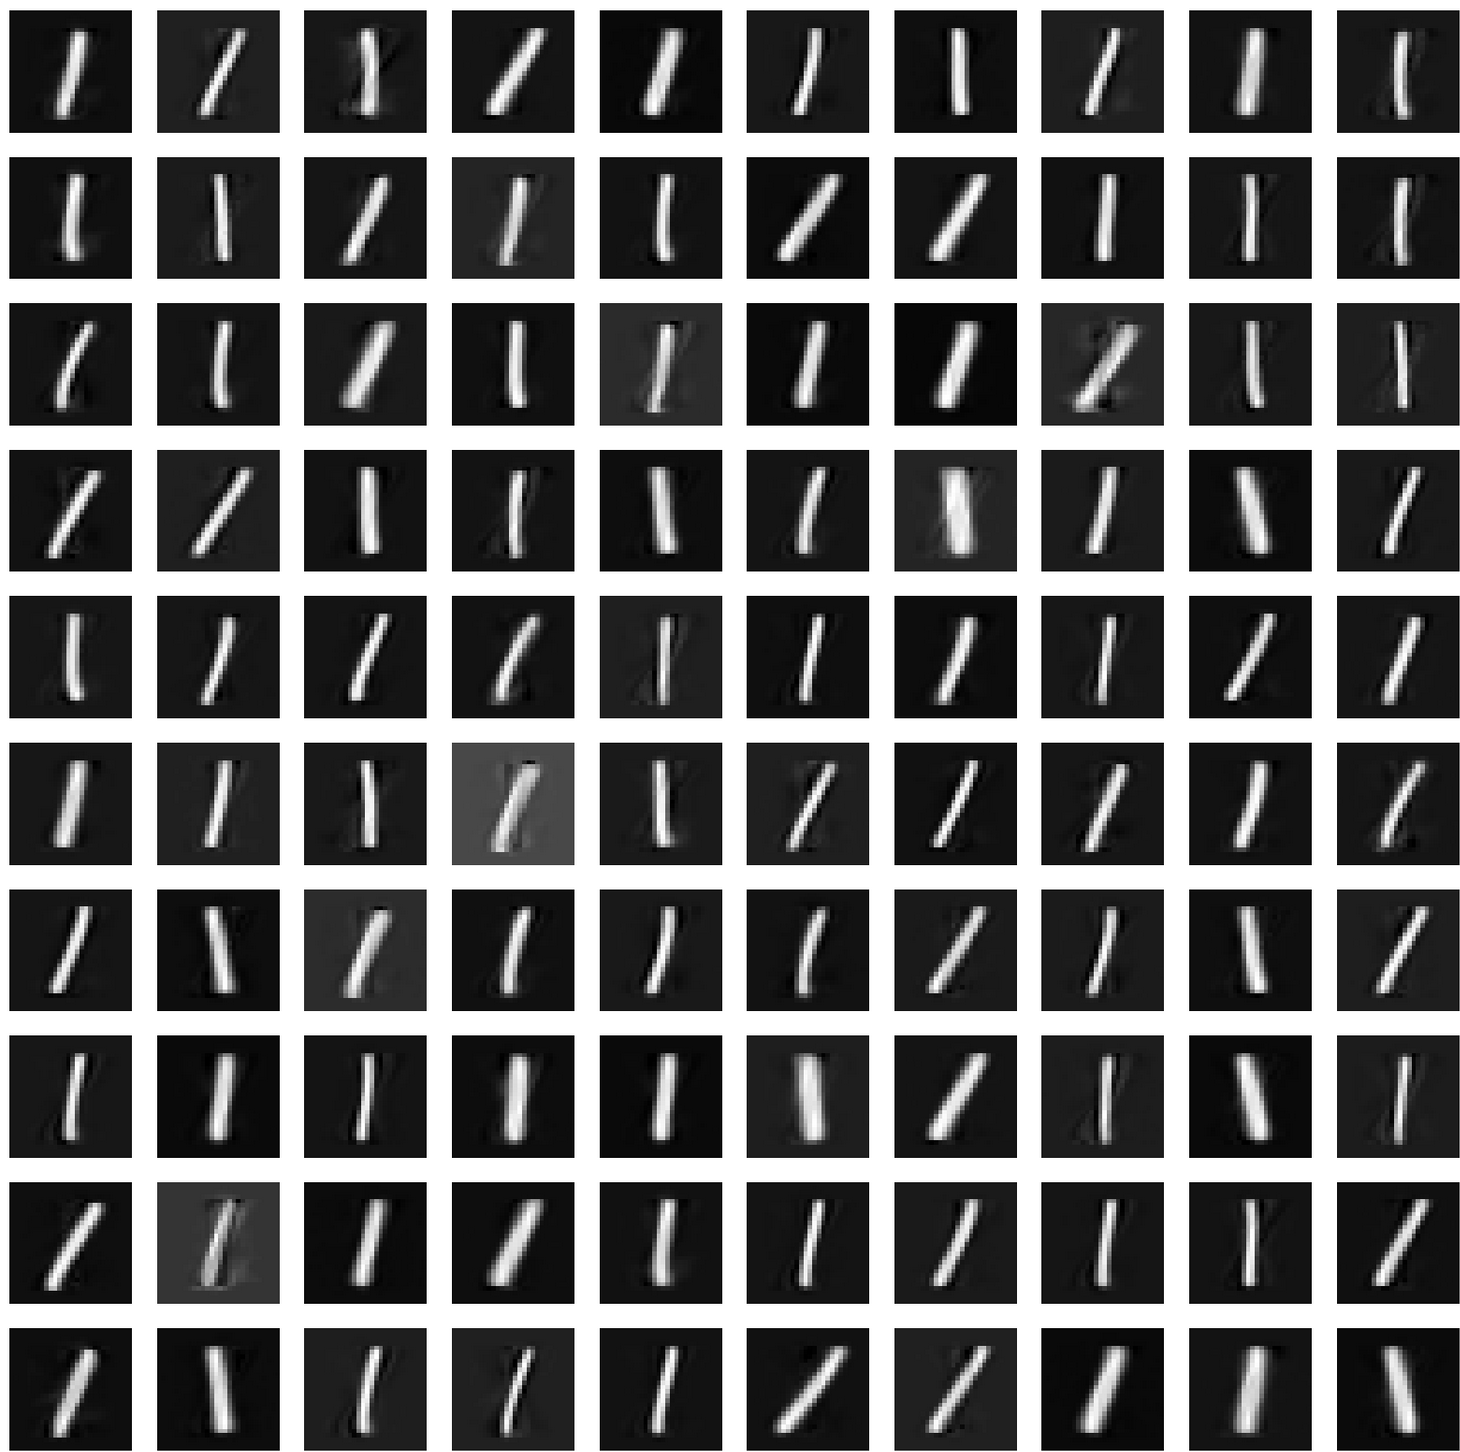